# ESE 538 ML TS 
## Homework 1
- Jie Wang
- Sep 12, 2024


In [29]:
# Library used
import numpy as np
import matplotlib.pyplot as plt
from functools import wraps

## Q1.  AR(1) process with a time-varying drift

### (d) plot

- code for 10 * 100 `random process`
- plot: 95% CI1

I don't like to rewrite same code, so let us write a function for all the r.p:


In [30]:
def process_type_selector(process_func):
    @wraps(process_func)
    def wrapper(*args, **kwargs):
        return process_func(*args, **kwargs)
    return wrapper

def plot_random_process(process_func, rp_name, theta_list,
                        alpha=1, var_sigma=10,
                        num_paths=10, path_length=100):
    """
    Function to plot random processes with given parameters.
    """
    # init np array for path result
    sample_paths = np.zeros((num_paths, path_length))
    np.random.seed(538)
    
    # run the process
    for i in range(num_paths):
        epsilon = np.random.normal(0, var_sigma, path_length)  # White noise
        sample_paths[i] = process_func(theta_list, alpha, epsilon, path_length)

    #  95% CI 
    mean_path = np.mean(sample_paths, axis=0)
    std_dev_path = np.std(sample_paths, axis=0)
    
    upper_bound = mean_path + 1.96 * std_dev_path
    lower_bound = mean_path - 1.96 * std_dev_path

    # Plot part
    plt.figure(figsize=(10, 6))
    # sample paths
    for i in range(num_paths):
        plt.plot(sample_paths[i], label=f'Path {i+1}', alpha=0.7)
    # mean path
    plt.plot(mean_path, color='black', label='Mean Path', linewidth=2)
    # 95% CI
    plt.fill_between(range(path_length), lower_bound, upper_bound, color='gray', alpha=0.3, label='95% CI')

    plt.title(f'Paths of {rp_name} with 95% CI')
    plt.xlabel('Time step (k)')
    plt.ylabel('Y_k')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.grid(True)
    plt.tight_layout()
    plt.show()



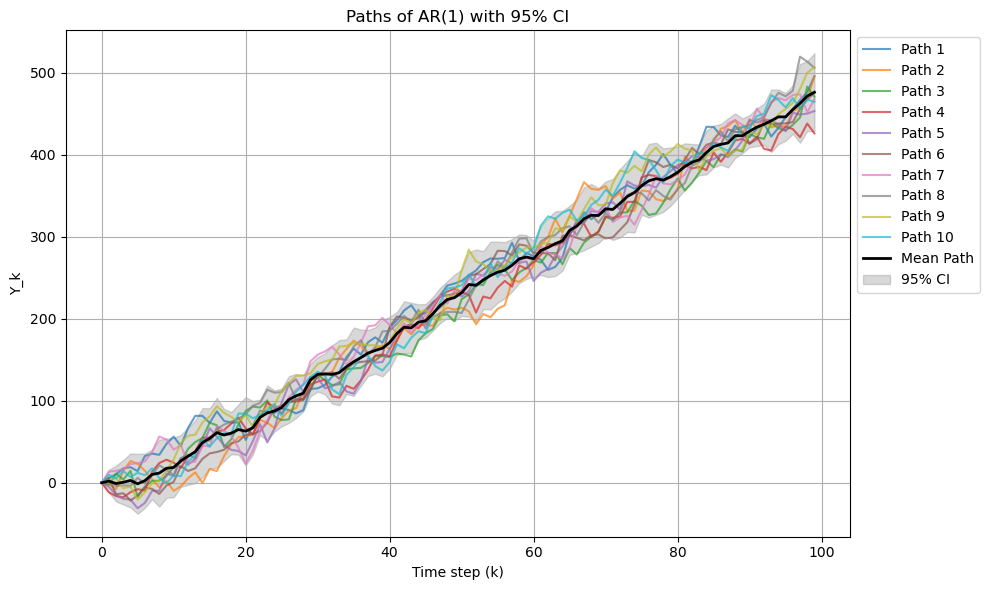

In [31]:
@process_type_selector
def AR1_process(theta_list, alpha, epsilon, path_length):
    Y = np.zeros(path_length)  #  Y_0 = 0
    phi = theta_list[0]
    for k in range(1, path_length):
        Y[k] =  alpha * (k-1) + epsilon[k-1] + phi * Y[k-1]
    return Y

plot_random_process(AR1_process,'AR(1)',theta_list=[0.8,])

## Q2:  Moving Average process of order 1
### (d) plot the process
- 10 sample path
- 100 length
- shaded area of 95% CI 
- $ \epsilon_t$ ~ $N(0,1)$
- $\phi_1 = 0.5, \alpha = 1, \sigma^2 = 10$


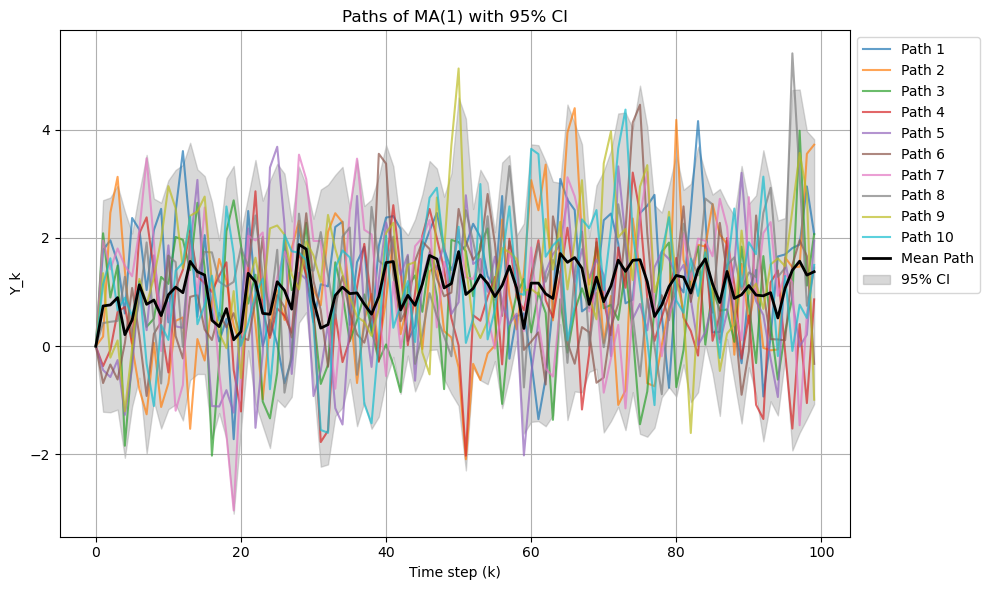

In [32]:
theta_1 = 0.5
sigma_epsilon = 1  

@process_type_selector
def MA1_process(theta_list, alpha, epsilon, path_length):
    Y = np.zeros(path_length)  #  Y_0 = 0
    theta_1 = theta_list[0]
    for k in range(1, path_length):
        Y[k] = 1 + epsilon[k] + theta_1 * epsilon[k-1]
    return Y

plot_random_process(MA1_process,'MA(1)',[theta_1,],var_sigma=sigma_epsilon)


## Q3: deterministic quadratic trend with random coefficient
Although there is no need to plot it, I print out of my interest

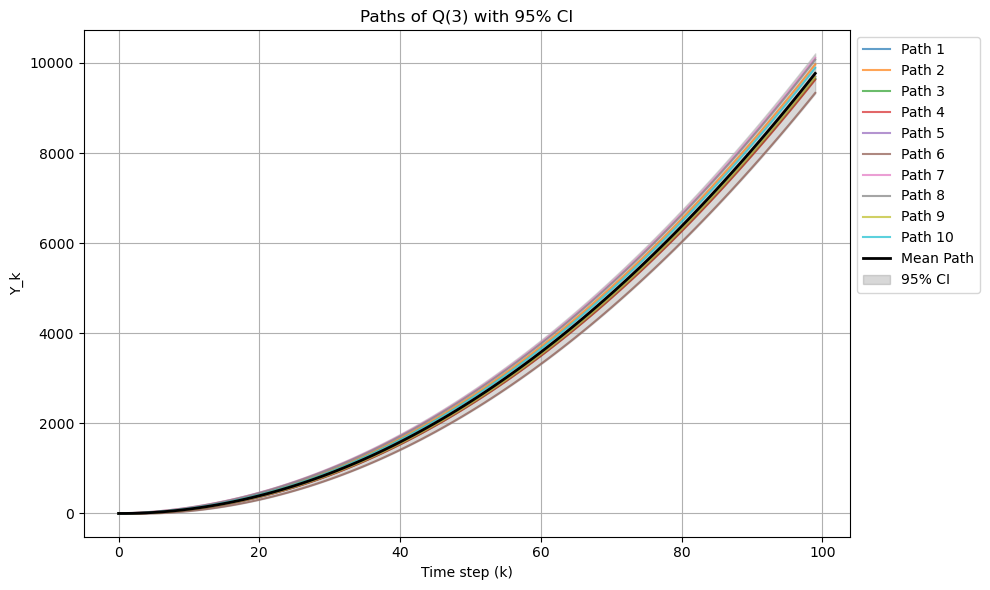

In [33]:
@process_type_selector
def Q3_process(theta_list, alpha, epsilon, path_length):
    Y = np.zeros(path_length)  #  Y_0 = 0

    alpha = np.random.normal(0, 1)  # α ~ N(0,1)
    beta = np.random.normal(0, 2)   # β ~ N(0,2)
    for k in range(1, path_length):
       Y[k] = alpha + beta * k + k**2
    return Y

plot_random_process(Q3_process,'Q(3)',[ ] )


## Q4: fair coin toss game
### (c) plot randome process 

the plot function above is not capable of dealing the discrete random varaible, so I rewrite one:

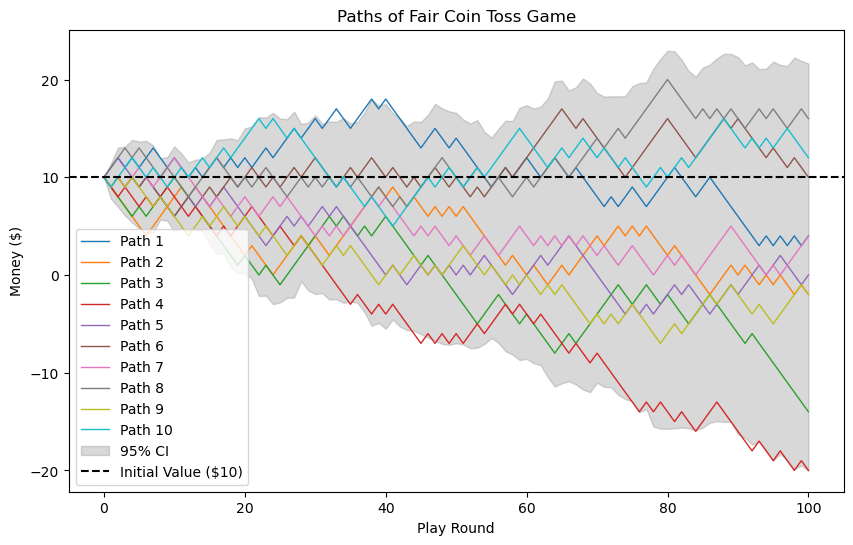

In [39]:
num_flips = 100
num_paths = 10
initial_value = 10

np.random.seed(538)  
flips = np.random.choice([-1, 1], size=(num_paths, num_flips))
Y = np.cumsum(flips, axis=1) + initial_value  # Cumulative sum to get money over time
Y = np.insert(Y, 0, initial_value, axis=1)  # Include the initial value

mean_Y = np.mean(Y, axis=0)
std_Y = np.std(Y, axis=0)

lower_bound = mean_Y - 1.96 * std_Y
upper_bound = mean_Y + 1.96 * std_Y

plt.figure(figsize=(10, 6))
for i in range(num_paths):
    plt.plot(Y[i], lw=1, label=f'Path {i+1}' )

plt.fill_between(range(num_flips+1), lower_bound, upper_bound, color='gray', alpha=0.3, label="95% CI")

plt.title('Paths of Fair Coin Toss Game')
plt.xlabel('Play Round')
plt.ylabel('Money ($)')
plt.axhline(y=initial_value, color='k', linestyle='--', label="Initial Value ($10)")
plt.legend()
plt.show()


*this reminds us don't gamble*